In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
from google.colab  import files
uploaded= files.upload()

Saving archive.zip to archive.zip


In [3]:
!unzip 'archive.zip'

Archive:  archive.zip
  inflating: spam.csv                


In [4]:
df = pd.read_csv(r'spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of spam and ham messages')

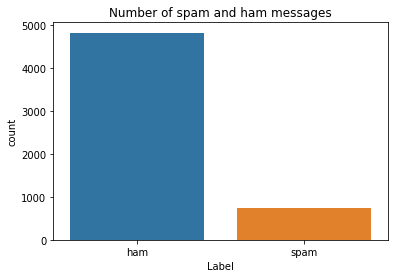

In [6]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of spam and ham messages')

In [7]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [10]:
def modelrnn():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('tanh')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [11]:
model = modelrnn()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy','mse','mae'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [12]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 18s 531ms/step - loss: 0.3055 - accuracy: 0.8979 - mse: 0.0790 - mae: 0.1613 - val_loss: 0.1822 - val_accuracy: 0.9765 - val_mse: 0.0359 - val_mae: 0.1332
Epoch 2/10
28/28 [==============================] - 15s 545ms/step - loss: 0.0869 - accuracy: 0.9784 - mse: 0.0356 - mae: 0.1506 - val_loss: 0.1980 - val_accuracy: 0.9787 - val_mse: 0.0460 - val_mae: 0.1671


In [13]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [14]:
accr = model.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 73ms/step - loss: 0.1340 - accuracy: 0.9839 - mse: 0.0400 - mae: 0.1613


In [15]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.134
  Accuracy: 0.984


In [16]:
model.save(r"C:\Users\ADMIN\Downloads\model_lSTM.h5")

In [17]:
from tensorflow.keras.models import load_model
m2 = load_model(r"C:\Users\ADMIN\Downloads\model_lSTM.h5")

In [18]:
m2.evaluate(test_sequences_matrix,Y_test)

35/35 [==============================] - 3s 75ms/step - loss: 0.1340 - accuracy: 0.9839 - mse: 0.0400 - mae: 0.1613


[0.1340080052614212,
 0.9838564991950989,
 0.03996460512280464,
 0.1612575650215149]